# Preliminary EDA on ZRI Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as sc

# Old Calculation of ZORI

In [3]:
zri = pd.read_csv(r'C:\Users\robla\Desktop\Zillow Rent Index Data\Zip_Zri_AllHomesPlusMultifamily.csv')

In [4]:
zri.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,3031.0,3058.0,3031.0,...,3785.0,3788.0,3786.0,3784.0,3766.0,3779.0,3843.0,3873.0,3835.0,NaN
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,1790.0,1787.0,1784.0,...,2039.0,2070.0,2105.0,2140.0,2168.0,2185.0,2125.0,NaN,2053.0,1996.0
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,3269.0,3304.0,3320.0,...,3874.0,3898.0,3917.0,3929.0,3931.0,3963.0,NaN,4123.0,4079.0,NaN
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,1547.0,1549.0,1560.0,...,1765.0,1755.0,1751.0,1752.0,1754.0,1759.0,1764.0,1769.0,1776.0,1778.0
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,1922.0,1925.0,1921.0,...,2245.0,2289.0,2332.0,2372.0,2398.0,2412.0,2348.0,2356.0,2311.0,NaN


In [5]:
Boken = zri.loc[zri['City'] == 'Hoboken'].iloc[:,7:].T.reset_index()

In [6]:
Boken.rename(columns = {63:'ZRI'}, inplace = True)

In [7]:
Boken.loc[:,'delta'] = Boken['ZRI'].diff(1)
Boken.loc[:,'log_delta'] = Boken['ZRI'].apply(lambda x: np.log(x)).diff(1)

In [8]:
Boken.head()

,index,ZRI,delta,log_delta
0,2010-09,2217.0,NaN,NaN
1,2010-10,2256.0,39.0,0.017438
2,2010-11,2289.0,33.0,0.014522
3,2010-12,2313.0,24.0,0.010430
4,2011-01,2327.0,14.0,0.006035


In [194]:
fig = px.line(data_frame = Boken, x = 'index',y = 'delta',title = 'CHANGE IN ZRI')
fig.show()

In [18]:
fig = px.line(data_frame = Boken, x = 'index',y = 'ZRI', title = 'ZRI')
fig.show()

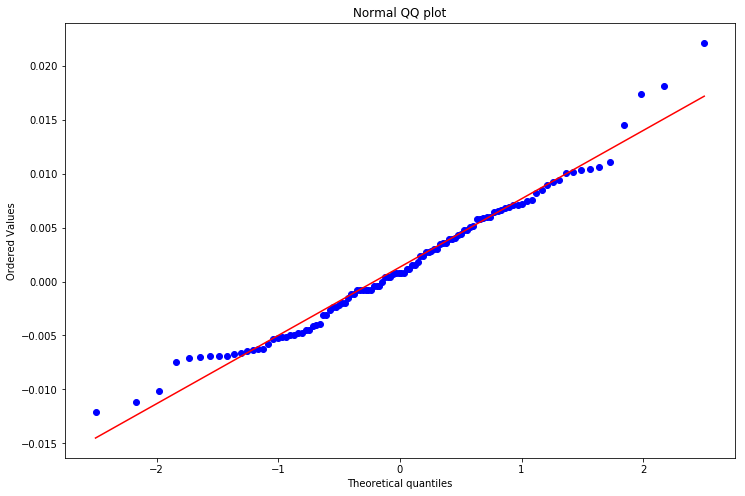

In [13]:
fig,ax = plt.subplots(figsize = (12,8))
ax.set_size_inches = (30,30)
sc.probplot(x= list(Boken['log_delta'])[1:], dist='norm', fit=True, plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [ ]:
Boken.loc[:,'ZRI'] = Boken['ZRI'].apply(lambda x: np.log(x))

In [ ]:
gas = pd.read_csv('../U.S._Regular_All_Formulations_Retail_Gasoline_Prices.csv')

In [ ]:
gas.head()

In [ ]:
gas = gas.reset_index()

In [ ]:
fig = px.line(data_frame = gas.sort_values(by = 'index', ascending = False), x = 'Month',y = 'U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon')
fig.show()

## New Formulation of ZORI

In [126]:
zori_ssa = pd.read_csv(r"C:\Users\robla\Desktop\nycdsa\Capstone\data_dump\Zip_ZORI_AllHomesPlusMultifamily_SSA.csv")
zori_ = pd.read_csv(r"C:\Users\robla\Desktop\nycdsa\Capstone\data_dump\Zip_ZORI_AllHomesPlusMultifamily_Smoothed.csv")

#### Seasonally Adjusted Zori

In [127]:
zori_ssa.loc[:,'State'] = zori_ssa['MsaName'].apply(lambda x: x[x.find(',') + 2:])
col = zori_ssa.pop('State')
zori_ssa.insert(4, 'State', col) 
zori_ssa.loc[:,'City'] = zori_ssa['MsaName'].apply(lambda x: x[:x.find(',')])
col = zori_ssa.pop('City')
zori_ssa.insert(5, 'City', col) 

In [128]:
set(zori_ssa.loc[zori_ssa['State']== 'TX']['City'])

{'Austin', 'Dallas-Fort Worth', 'El Paso', 'Houston', 'San Antonio'}

In [129]:
Tex_zori_ssa = zori_ssa.loc[zori_ssa['City'].isin(['Houston','Dallas-Fort Worth','San Antonio','Austin'])]

In [151]:
ts_wide_ssa = Tex_zori_ssa.T
ts_wide_ssa.columns = list(ts_wide_ssa.loc['RegionName',:])
City_state = list(ts_wide_ssa.loc['MsaName',:])
ts_wide_ssa = ts_wide_ssa.drop(['RegionName','RegionID','State','City','SizeRank','MsaName'], axis = 0).reset_index()
ts_wide_ssa.rename(columns={'index':'Time'}, inplace = True)
ts_wide_ssa.loc[:,'Time'] = ts_wide_ssa['Time'].apply(lambda x: x[x.find('-')+1:] + '-' + x[:x.find('-')])

In [152]:
fig = px.line(data_frame = ts_wide_ssa, x = 'Time',y = list(ts.columns)[1:], title = 'Seasonally Adjusted ZORI 2014-2021')
fig.show()

In [134]:
zori_ssa

,RegionID,RegionName,SizeRank,MsaName,State,City,2014-01,2014-02,2014-03,2014-04,...,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,61639,10025,1,"New York, NY",NY,New York,2889.0,2904.0,2919.0,2934.0,...,2954.0,2944.0,2934.0,2924.0,2917.0,2909.0,2902.0,2899.0,2897.0,2894.0
1,84654,60657,2,"Chicago, IL",IL,Chicago,1406.0,1411.0,1416.0,1422.0,...,1597.0,1595.0,1593.0,1591.0,1590.0,1588.0,1587.0,1586.0,1585.0,1584.0
2,61637,10023,3,"New York, NY",NY,New York,3003.0,3012.0,3022.0,3031.0,...,2949.0,2937.0,2925.0,2913.0,2904.0,2894.0,2885.0,2880.0,2874.0,2869.0
3,91982,77494,4,"Houston, TX",TX,Houston,1390.0,1387.0,1384.0,1381.0,...,1378.0,1387.0,1395.0,1404.0,1414.0,1423.0,1432.0,1442.0,1452.0,1462.0
4,84616,60614,5,"Chicago, IL",IL,Chicago,1692.0,1697.0,1702.0,1707.0,...,1922.0,1922.0,1922.0,1921.0,1922.0,1922.0,1922.0,1924.0,1926.0,1928.0
5,91940,77449,6,"Houston, TX",TX,Houston,1202.0,1205.0,1209.0,1213.0,...,1438.0,1452.0,1466.0,1479.0,1494.0,1508.0,1522.0,1537.0,1552.0,1567.0
6,61616,10002,7,"New York, NY",NY,New York,2723.0,2739.0,2755.0,2770.0,...,2852.0,2838.0,2824.0,2810.0,2800.0,2789.0,2779.0,2774.0,2768.0,2763.0
7,91733,77084,8,"Houston, TX",TX,Houston,1058.0,1065.0,1071.0,1077.0,...,1289.0,1298.0,1306.0,1315.0,1324.0,1333.0,1342.0,1351.0,1361.0,1370.0
8,93144,79936,9,"El Paso, TX",TX,El Paso,887.0,886.0,885.0,885.0,...,986.0,993.0,999.0,1005.0,1011.0,1017.0,1024.0,1030.0,1036.0,1043.0
9,84640,60640,10,"Chicago, IL",IL,Chicago,1249.0,1250.0,1252.0,1253.0,...,1418.0,1416.0,1415.0,1413.0,1411.0,1410.0,1408.0,1407.0,1406.0,1404.0


In [182]:
zori_long_ssa = pd.melt(zori_ssa,
                    id_vars = ['RegionID','RegionName','SizeRank','City','State'],
                    value_vars = list(zori_ssa.columns)[6:])

zori_long_ssa.rename(columns = {'variable':'Time','value':'zori_ssa'}, inplace = True)

tx_zori_long_ssa = zori_long_ssa.loc[zori_long['City'].isin(['Houston','San Antonio','Dallas-Fort Worth','Austin'])]

tx_zori_long_ssa = tx_zori_long_ssa[['RegionName','Time','zori_ssa']].reset_index().drop('index',axis = 1)

tx_zori_long_ssa.loc[tx_zori_long_ssa['RegionName'] == 77494]

,RegionName,Time,zori_ssa
0,77494,2014-01,1390.0
213,77494,2014-02,1387.0
426,77494,2014-03,1384.0
639,77494,2014-04,1381.0
852,77494,2014-05,1379.0
1065,77494,2014-06,1376.0
1278,77494,2014-07,1373.0
1491,77494,2014-08,1370.0
1704,77494,2014-09,1368.0
1917,77494,2014-10,1365.0


In [188]:
tx_zori_long_ssa.loc[:,'zori_ssa_diff'] = tx_zori_long_ssa['zori_ssa'].diff(213)

In [189]:
tx_zori_long_ssa.loc[tx_zori_long_ssa['RegionName'] == 77494]

,RegionName,Time,zori_ssa,zori_ssa_diff
0,77494,2014-01,1390.0,NaN
213,77494,2014-02,1387.0,-3.0
426,77494,2014-03,1384.0,-3.0
639,77494,2014-04,1381.0,-3.0
852,77494,2014-05,1379.0,-2.0
1065,77494,2014-06,1376.0,-3.0
1278,77494,2014-07,1373.0,-3.0
1491,77494,2014-08,1370.0,-3.0
1704,77494,2014-09,1368.0,-2.0
1917,77494,2014-10,1365.0,-3.0


In [191]:
fig = px.line(data_frame = tx_zori_long_ssa, x = 'Time',y = 'zori_ssa',color = 'RegionName' ,title = 'Seasonally Adjusted ZORI 2014-2021')
fig.show()

In [193]:
fig = px.line(data_frame = tx_zori_long_ssa, x = 'Time',y = 'zori_ssa_diff',color = 'RegionName' ,title = 'Seasonally Adjusted Delta_ZORI 2014-2021')
fig.show()